# Curve Fitting
Curve fitting differs from interpolation in that the fitted curve may not pass through all the points in the data set whereas an interpolated curve necesarily passes through every point in the data set. Further, interpolation usually is not used to obtain the interpolant for a point that lies outside the range of the given data set, that is, extrapolation is not done whereas curve fitting may be used for points outside the data set.

## Least-Squares Polynomial Fit
Given a set of data with $N$ points, we wish to fit a polynomial curve of degree $n$ to the data. Obviously, $N \geq n+1$. If $N = n+1$, it is the same as interpolation. Assuming the relationship:
$$
y = a_0 + a_1 x + a_2 x^2 + \cdots + a_n x^n
$$
If $Y_i$ are the observed or experimental value and $y_i$ are the calculated values, corresponding to $x_i$ (with $x_i$ free of error), the errors are defined by
$$
e_i = Y_i - y_i = Y_i - a_0 - a_1 x - a_2 x^2 - \cdots - a_n x^2
$$
We minimize the sum of sqaures:

$$
S = \sum_{i=1}^{N} \left( Y_i - a_0 - a_1 x - a_2 x^2 - \cdots - a_n x^2 \right)^2
$$
At the minimum, all the partial derivatives $\partial S/\partial a_i=0, \quad i=1, 2, \ldots , n$. Writing the equations for these gives $n+1$ equations:
$$
\begin{align*}
\frac{\partial S}{\partial a_0} &= 0 = \sum_{}^{} 2 \left( Y_i - a_0 - a_1 x - a_2 x^2 - \cdots - a_n x^n \right) \left( -1 \right) \\
\frac{\partial S}{\partial a_1} &= 0 = \sum_{}^{} 2 \left( Y_i - a_0 - a_1 x - a_2 x^2 - \cdots - a_n x^n \right) \left( -x_i \right) \\
& \vdots \\
\frac{\partial S}{\partial a_n} &= 0 = \sum_{}^{} 2 \left( Y_i - a_0 - a_1 x - a_2 x^2 - \cdots - a_n x^n \right) \left( -x_i^n \right) \\
\end{align*}
$$
Dividing each equation by $-2$ and rearranging gives the $n+1$ normal equations to be solved simultaneously:
$$
\begin{align*}
a_0 N + a_1 \sum x_i + a_2 x_i^2 + \cdots + a_n \sum x_i^n &= \sum Y_i \\
a_0 \sum x_i + a_1 x_i^2 + a_2 \sum x_i^3 \cdots + a_n \sum x_i^{n+1} &= \sum x_i Y_i \\
a_0 \sum x_i^2 + a_1 \sum x_i^3 + a_2 x_i^4 + \cdots + a_n \sum x_i^{n+2} &= \sum x_i^2 Y_i \\
& \vdots \\
a_0 x_i^n + a_1 \sum x_i^{n+1} + a_2 \sum x_i^{n+2} \cdots + a_n \sum x_i^{n+1} &= \sum x_i^{2n} Y_i
\end{align*}
$$
In matrix form, the equations can be written as:
$$
\begin{bmatrix}
N & \sum x_i & \sum x_i^{2} & \sum x_i^{3} & \cdots & \sum x_i^{n} \\
\sum x_i & \sum x_i^{2} & \sum x_i^{3} & \sum x_i^{4} & \cdots & \sum x_i^{n+1} \\
\sum x_i^{2} & \sum x_i^{3} & \sum x_i^{4} & \sum x_i^{5} & \cdots & \sum x_i^{n+2} \\
         &    &  \vdots & ~ & \ddots & \dots \\
\sum x_i^{n} & \sum x_i^{n+1} & \sum x_i^{n+2} & \sum x_i^{n+3} & \cdots & \sum x_i^{2n}
\end{bmatrix}
\begin{bmatrix} a_0 \\ a_1 \\ a_2 \\ \vdots \\ a_n \end{bmatrix} = 
\begin{bmatrix} \sum Y_i \\ \sum x_i Y_i \\ \sum x_i^{2} Y_i \\ \vdots \\ \sum x_i^{n} Y_i \end{bmatrix}
$$

## Least-Squares Polynomial Fit using AvailableFunctions in NumPy
We will first use the available functions from NumPy to carry out least-squares polynomial fit **`numpy.polyfit()`** and polynomial evaluation **`numpy.polyval()`**.

0 -1.0 -1.0
1 0.0 3.0
2 1.0 2.5
3 2.0 5.0
4 3.0 4.0
5 5.0 2.0
6 7.0 5.0
7 9.0 4.0
n = 4 Coefficients [-0.01181972  0.21689153 -1.23263048  2.30145967  2.68558951]
[-1.07721189  2.68558951  3.95949051  3.90400358  3.39496782  3.10123928
  4.41155004  4.12037114]
n = 3 Coefficients [ 0.03026042 -0.44164664  1.8132651   1.89427432]
n = 2 Coefficients [-0.08571764  0.99555712  1.64843913]
n = 1 Coefficients [ 0.31432749  2.04093567]


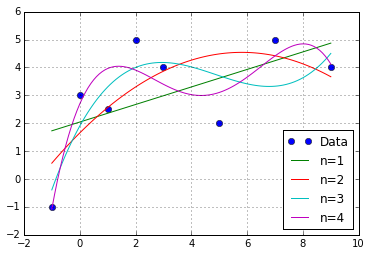

In [1]:
from __future__ import division
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

x = np.array([-1, 0, 1, 2, 3, 5, 7, 9.0])
y = np.array([-1, 3, 2.5, 5, 4, 2, 5, 4])
for i in range(len(x)):
    print i, x[i], y[i]

xx = np.linspace(np.min(x), np.max(x), 101)

# Using available function polyfit) from NumPy
p4 = np.polyfit(x, y, 4)
y4 = np.polyval(p4, xx)
print 'n =', 4, 'Coefficients', p4
print np.polyval(p4, x)

p3 = np.polyfit(x, y, 3)
y3 = np.polyval(p3, xx)
print 'n =', 3, 'Coefficients', p3

p2 = np.polyfit(x, y, 2)
y2 = np.polyval(p2, xx)
print 'n =', 2, 'Coefficients', p2

p1 = np.polyfit(x, y, 1)
y1 = np.polyval(p1, xx)
print 'n =', 1, 'Coefficients', p1

plt.ylim((-2, 6))
plt.plot(x, y, 'o')
plt.plot(xx, y1)
plt.plot(xx, y2)
plt.plot(xx, y3)
plt.plot(xx, y4)
plt.grid()
plt.legend(['Data', 'n=1', 'n=2', 'n=3', 'n=4'], loc=4)
plt.show()

## Least-Squares Polynomial Fit using Our Own Functions
We can develop our own function for least-squares polynomial fit based on theory given above and use Horner's method to efficiently evaluate the resulting polynomial at selected values of $x$. Here are our own functions equivalent to **`numpy.polyfit()`** and **`numpy.polyval()`**.

In [2]:
def regression(x, y, n):
    m = len(x)
    if len(y) != m:
        return None

    xx = np.zeros((m, n+1), dtype=float)
    for j in range(n+1):
        xx[:, j] = x**j
    
    X = np.dot(xx.T, xx)
    b = np.dot(xx.T, y)
    a = np.linalg.solve(X, b)
    return a

def horner(a, x):
    '''
    horner(a[0:n-1]:float, x[0:m-1]:float) -> s[0:m-1]:float
    Evaluation of a polynomial by Horner's method
    '''
    s = a[-1]
    for i in range(len(a)-2, -1, -1):
        print i, a[i]
        s = a[i] + s * x
    return s

print x
print y
p = regression(x, y, 4)
print p
xx = np.linspace(np.min(x), np.max(x), 101)

print horner(p, x)

[-1.  0.  1.  2.  3.  5.  7.  9.]
[-1.   3.   2.5  5.   4.   2.   5.   4. ]
[ 2.68558951  2.30145967 -1.23263048  0.21689153 -0.01181972]
3 0.21689152773
2 -1.23263047652
1 2.30145966906
0 2.68558951215
[-1.07721189  2.68558951  3.95949051  3.90400358  3.39496782  3.10123928
  4.41155004  4.12037114]


We see that the results obtained using our functions are identical to those obtained using available functions in NumPy.

## Solved Example from Gerald and Wheatley

Example from Gerald, C.F. and Wheatley, P.O., _Applied Numerical Analysis_, 6ed., Pearson Education, 1999, pp. 271

[ 0.05  0.11  0.15  0.31  0.46  0.52  0.7   0.74  0.82  0.98  1.17]
[ 0.956  0.89   0.832  0.717  0.571  0.539  0.378  0.37   0.306  0.242
  0.104]
[ 0.99796838 -1.01804246  0.22468213]
1 -1.01804246474
0 0.997968384183
    i        x        Y        y  (Y - y)/Y
-------------------------------------------
    0    0.050    0.956    0.948      0.876
    1    0.110    0.890    0.889      0.146
    2    0.150    0.832    0.850     -2.202
    3    0.310    0.717    0.704      1.818
    4    0.460    0.571    0.577     -1.088
    5    0.520    0.539    0.529      1.792
    6    0.700    0.378    0.395     -4.612
    7    0.740    0.370    0.368      0.634
    8    0.820    0.306    0.314     -2.696
    9    0.980    0.242    0.216     10.714
   10    1.170    0.104    0.114    -10.025

Using numpy.polyfit()
[ 0.22468213 -1.01804246  0.99796838]


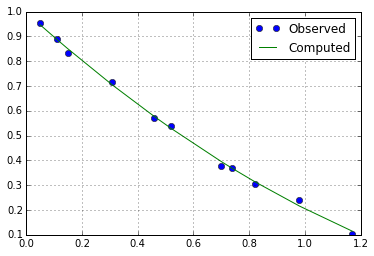

In [19]:
x = np.array([ 0.05,  0.11,  0.15,  0.31,  0.46,  0.52,  0.70,  0.74,  0.82,  0.98,  1.17])
Y = np.array([0.956, 0.890, 0.832, 0.717, 0.571, 0.539, 0.378, 0.370, 0.306, 0.242, 0.104])
print x
print Y

a = regression(x, Y, 2)
print a

y = horner(a, x)
print "%5s %8s %8s %8s %10s" % ('i', 'x', 'Y', 'y', '(Y - y)/Y')
print '-'*43
for i in range(len(x)):
    print "%5d %8.3f %8.3f %8.3f %10.3f" %  (i, x[i], Y[i], y[i], (Y[i] - y[i])/Y[i]*100)
print '\nUsing numpy.polyfit()'
print np.polyfit(x, Y, 2)

plt.plot(x, Y, 'o')
plt.plot(x, y)
plt.grid()
plt.legend(['Observed', 'Computed'])
plt.show()